In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from enum import Enum
%matplotlib inline

In [7]:
class Labels(Enum):
    ALL = 0,
    TOXIC = 1,
    SEVERE_TOXIC = 2,
    OBSCENE = 3,
    THREAT = 4,
    INSULT = 5,
    IDENTITY_HATE = 6

class DataSets(Enum):
    TRAIN = 0,
    VALIDATION = 1

class Metrics(Enum):
    ROC_AUC = 0,
    F1 = 1

In [8]:
def calculate_mean_std(scores, data_set, label, metric):
    best_epochs = scores[:, data_set.value, :, label.value, metric.value].max(axis=1)
    return best_epochs.mean(), best_epochs.std()

def calculated_all_metrics(scores):
    roc_all_mean, roc_all_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.ALL, Metrics.ROC_AUC)
    roc_c1_mean, roc_c1_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.TOXIC, Metrics.ROC_AUC)
    roc_c2_mean, roc_c2_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.SEVERE_TOXIC, Metrics.ROC_AUC)
    roc_c3_mean, roc_c3_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.OBSCENE, Metrics.ROC_AUC)
    roc_c4_mean, roc_c4_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.THREAT, Metrics.ROC_AUC)
    roc_c5_mean, roc_c5_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.INSULT, Metrics.ROC_AUC)
    roc_c6_mean, roc_c6_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.IDENTITY_HATE, Metrics.ROC_AUC)
    f1_all_mean, f1_all_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.ALL, Metrics.F1)
    f1_c1_mean, f1_c1_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.TOXIC, Metrics.F1)
    f1_c2_mean, f1_c2_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.SEVERE_TOXIC, Metrics.F1)
    f1_c3_mean, f1_c3_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.OBSCENE, Metrics.F1)
    f1_c4_mean, f1_c4_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.THREAT, Metrics.F1)
    f1_c5_mean, f1_c5_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.INSULT, Metrics.F1)
    f1_c6_mean, f1_c6_std = calculate_mean_std(scores, DataSets.VALIDATION, Labels.IDENTITY_HATE, Metrics.F1)
    
    print("ROC AUC over 5 runs:")
    print("{:20s} {:.4f} ±{:.4f}".format('All labels:', roc_all_mean, roc_all_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Toxic:', roc_c1_mean, roc_c1_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Severe toxic:', roc_c2_mean, roc_c2_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Obscene:', roc_c3_mean, roc_c3_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Threat:', roc_c4_mean, roc_c4_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Insult:', roc_c5_mean, roc_c5_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Identity hate:', roc_c6_mean, roc_c6_std))
    print("F1 over 5 runs:")
    print("{:20s} {:.4f} ±{:.4f}".format('All labels:', f1_all_mean, f1_all_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Toxic:', f1_c1_mean, f1_c1_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Severe toxic:', f1_c2_mean, f1_c2_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Obscene:', f1_c3_mean, f1_c3_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Threat:', f1_c4_mean, f1_c4_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Insult:', f1_c5_mean, f1_c5_std))
    print("{:20s} {:.4f} ±{:.4f}".format('Identity hate:', f1_c6_mean, f1_c6_std))

def plot_learningcurve(scores, label, metric):
    train_scores = scores[:, DataSets.TRAIN.value, :, label.value, metric.value].mean(axis=1)
    val_scores = scores[:, DataSets.VALIDATION.value, :, label.value, metric.value].mean(axis=1)
    plt.plot(val_scores[0])
    plt.plot(train_scores[0])

# CNN Architecture Experiments

### Singlelayer CNN

In [9]:
ex1_scores = np.load('data/scores/cnn_simple/scores_1543539380.5547197.npy')
ex1_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9779 ±0.0011
Toxic:               0.9606 ±0.0030
Severe toxic:        0.9859 ±0.0012
Obscene:             0.9749 ±0.0015
Threat:              0.9841 ±0.0048
Insult:              0.9703 ±0.0019
Identity hate:       0.9758 ±0.0034
F1 over 5 runs:
All labels:          0.6271 ±0.0137
Toxic:               0.6352 ±0.0355
Severe toxic:        0.3079 ±0.0442
Obscene:             0.6814 ±0.0097
Threat:              0.3434 ±0.1781
Insult:              0.6525 ±0.0070
Identity hate:       0.5537 ±0.0101


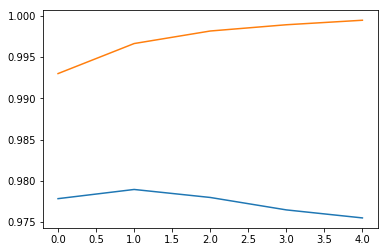

In [10]:
calculated_all_metrics(ex1_scores)
plot_learningcurve(ex1_scores, Labels.ALL, Metrics.ROC_AUC)

### Singlelayer CNN with multiple window sizes

In [11]:
ex2_scores = np.load('data/scores/cnn_multiwindowsizes/scores_1543641482.1065862.npy')
ex2_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9781 ±0.0012
Toxic:               0.9605 ±0.0033
Severe toxic:        0.9865 ±0.0008
Obscene:             0.9748 ±0.0010
Threat:              0.9830 ±0.0033
Insult:              0.9702 ±0.0016
Identity hate:       0.9747 ±0.0027
F1 over 5 runs:
All labels:          0.6309 ±0.0128
Toxic:               0.6368 ±0.0313
Severe toxic:        0.3741 ±0.0347
Obscene:             0.6811 ±0.0084
Threat:              0.3013 ±0.1686
Insult:              0.6532 ±0.0065
Identity hate:       0.5536 ±0.0135


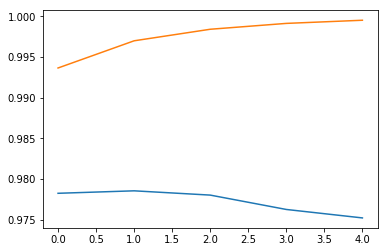

In [12]:
calculated_all_metrics(ex2_scores)
plot_learningcurve(ex2_scores, Labels.ALL, Metrics.ROC_AUC)

### Multilayer CNN

In [13]:
ex3_scores = np.load('data/scores/cnn_multilayer/scores_1543686279.5532448.npy')
ex3_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9770 ±0.0011
Toxic:               0.9593 ±0.0025
Severe toxic:        0.9871 ±0.0006
Obscene:             0.9743 ±0.0015
Threat:              0.9805 ±0.0046
Insult:              0.9680 ±0.0014
Identity hate:       0.9724 ±0.0025
F1 over 5 runs:
All labels:          0.6253 ±0.0100
Toxic:               0.6380 ±0.0255
Severe toxic:        0.3479 ±0.0500
Obscene:             0.6828 ±0.0144
Threat:              0.2622 ±0.1450
Insult:              0.6386 ±0.0080
Identity hate:       0.5155 ±0.0359


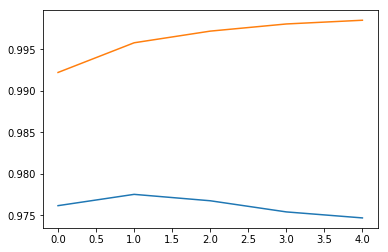

In [14]:
calculated_all_metrics(ex3_scores)
plot_learningcurve(ex3_scores, Labels.ALL, Metrics.ROC_AUC)

### Dilated CNN

In [15]:
ex4_scores = np.load('data/scores/cnn_dilated/scores_1544054844.630442.npy')
ex4_scores.shape

(5, 2, 5, 7, 2)

ROC AUC over 5 runs:
All labels:          0.9763 ±0.0005
Toxic:               0.9613 ±0.0017
Severe toxic:        0.9877 ±0.0005
Obscene:             0.9754 ±0.0012
Threat:              0.9741 ±0.0059
Insult:              0.9670 ±0.0011
Identity hate:       0.9613 ±0.0055
F1 over 5 runs:
All labels:          0.6324 ±0.0076
Toxic:               0.6601 ±0.0129
Severe toxic:        0.3898 ±0.0358
Obscene:             0.6970 ±0.0080
Threat:              0.0073 ±0.0107
Insult:              0.6305 ±0.0063
Identity hate:       0.1343 ±0.1125


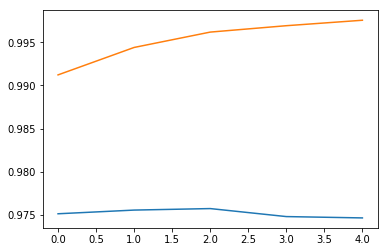

In [16]:
calculated_all_metrics(ex4_scores)
plot_learningcurve(ex4_scores, Labels.ALL, Metrics.ROC_AUC)